# Visualização de sinais com Python -  Tempo e frequência

Para compreender como funciona a plotagem no tempo discreto, é necessário retomar alguns conceitos estatísticos:

- **Taxa de Amostragem:**  É a frequência em que serão colhidas amostras do sinal. Ela é responsável pela fidelidade do sinal analógico com o sinal formado digital. Por ser uma frequência, geralmente é medida em kHz.

A forma de onda que trabalharemos terá o seguinte padrão:
$$ y(t)= A\cdot sen(\omega\cdot t)$$
sendo: 
- A = Amplitude 
- ω = 2*π*f Frequência angular
- f = Frequência

# Gerando sinais com Python

Para a geração de sinais, usaremos a biblioteca **Numpy**, e para visualizá-los usaremos a **Matplotlib.**

---
Execute o seguinte código utilizando a Spyder (veja mais sobre a Spyder [aqui](https://nbviewer.jupyter.org/github/jmarcoscosta/python-gppcom/blob/master/handson02_python.ipynb) ):

In [2]:
#tutorial de geração e visualização de sinais com Python
# Autor: João Marcos Costa (Engenharia Elétrica)
# Data: 26/04/2017
# GppCom/DCO/UFRN, Natal/RN

import numpy as np
fsampling = 10 #10KHz : taxa de amostragem
tf = 200
T = np.arange(0,tf,(1/fsampling)) #array com valores de tempo
f_m = 0.04 #frequência de m(t) em KHz (convencionado)
A_m = 2 #amplitude de m(t)
m_t = A_m*np.cos(2*np.pi*f_m*T)


Confira o explorador de variáveis da IDE:
![Figura01](./handsOn4_python_figs/fig1.png)

Foram definidas 2000 amostras do sinal m(t), de forma que para cada elemento do vetor t existe um valor correspondente na função m(t).
Plotaremos a função no tempo acrescentando o código para plotagem.

## Visualização do sinal de amostras no tempo

Para gerar e visualizar a função no tempo, acrescente no código:

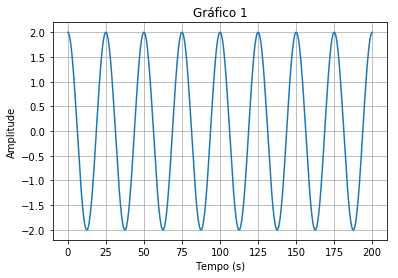

In [3]:
import matplotlib.pyplot as plt 
plt.plot(T,m_t)
plt.grid()
plt.title("Gráfico 1")
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.show()

Sabendo que o sinal original (analógico) tem frequência fm=0.04 kHz, o que podemos esperar dos gráficos desses dois novos sinais?

- Qual a influência da taxa de amostragem no número de pontos?

- Qual a influência da taxa de amostragem na visualização do sinal?

- E se quisermos recuperar o sinal analógico através das amostras, qual taxa de amostragem precisamos usar?



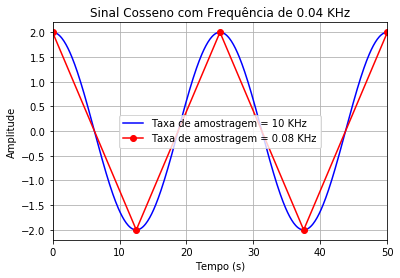

In [13]:
fsampling = 0.08 #frequência do sinal novo
%matplotlib inline 
#permite interatividade
T_2 = np.arange(0,tf,(1/fsampling))
m_t_2 = A_m*np.cos(2*np.pi*f_m*T_2)
sinal_1, = plt.plot(T,m_t,'b')
sinal_2, = plt.plot(T_2,m_t_2,'r-o')
plt.legend([sinal_1,sinal_2],['Taxa de amostragem = 10 KHz','Taxa de amostragem = 0.08 KHz'])
plt.grid()
plt.title("Sinal Cosseno com Frequência de 0.04 KHz")
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.xlim([0,50])
plt.show()

No sinal acima foi realizado a amostragem com 10kHz possibilitando uma boa fidelidade com a função cosseno original.  Como nosso sinal têm frequência de 0.04KHz, fizemos uma amostragem com frequência duas vezes a frequência do sinal e as mostraremos no mesmo gráfico. Perceba que ainda é possível recompor o sinal original, contudo o sinal foi bastante degradado. Agora faremos a amostragem com a mesma frequência do sinal 0.04kHz:

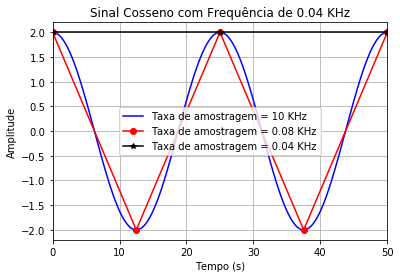

In [14]:
fsampling = 0.04 #frequência do sinal novo
%matplotlib inline 
#permite interatividade
T_3 = np.arange(0,tf,(1/fsampling))
m_t_3 = A_m*np.cos(2*np.pi*f_m*T_3)
sinal_1, = plt.plot(T,m_t,'b')
sinal_2, = plt.plot(T_2,m_t_2,'r-o')
sinal_3, = plt.plot(T_3,m_t_3,'k-*')
plt.legend([sinal_1,sinal_2,sinal_3],['Taxa de amostragem = 10 KHz','Taxa de amostragem = 0.08 KHz','Taxa de amostragem = 0.04 KHz'])
plt.grid()
plt.title("Sinal Cosseno com Frequência de 0.04 KHz")
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.xlim([0,50])
plt.show()


Nesse caso toda a informação será perdida pois não há como recuperar o sinal! Isso foi previsto no teorema de Nyquist.
Pode-se notar que para definir a frequência de amostragem deve ser levado em consideração a frequência do sinal recebido.
Considerando o processo de reconstrução do sinal através de interpolação, devemos obedecer o critério de Nyquist que estabelece que a taxa de amostragem deve ser maior que duas vezes a maior frequência do sinal amostrado.

## Visualização do sinal na frequência

Para visualizarmos o sinal na frequência, usaremos a transformada discreta de Fourier. Segue a definição (equivalente a implementada no Matlab) :

$$ X[k] = \sum\limits_{j=0}^{N-1} x[n]\cdot e^{-2\pi j \frac{nk}{N} }\hspace{20mm} $$
A transformada inversa é dada por:

$$ x[n] = \frac{1}{N} \sum\limits_{k=0}^{N-1} X[k]\cdot e^{2\pi j \frac{nk}{N} } \hspace{20mm} $$

### Espectro unilateral da amplitude

A aplicação da FFT (_Fast Fourier Transform_) num sinal discreto (lembre-se que, computacionalmente falando, não existem sinais contínuos) será trabalhada utilizando as bibliotecas de Python:
- Geração dos sinais: biblioteca Numpy
- Operações de FFT (transformada inversa, direta, entre outras funções): [Numpy.fft](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html), pacote da Numpy
- Visualização: Matplotlib 
Vale salientar que a operação realizada ainda é a conhecida DFT, e FFT - para não haver confusões - é apenas um algoritmo otimizado (mais rápido de se executar), e de **mesmo retorno**. <br\> Os dois códigos abaixo mostram a implementação da DFT e a FFT (_built-in_) para que possamos comparar o tempo gasto com a execução.

#### Implementação da DFT

Tempo de execução: 0.06676599999999944


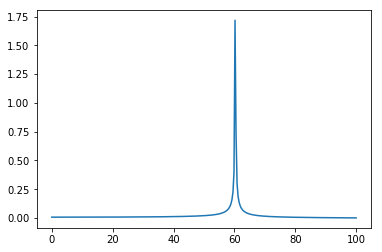

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import time
N_amostras = 600 
f_amostragem = 200
t_amostragem = 1/f_amostragem
x = np.linspace(0.0,N_amostras*t_amostragem,N_amostras) #eixo do tempo 
f = 60.0 # Hz
Am = 2 # amplitude
y = Am*np.cos(2.0*np.pi*f*x)  # sinal senoidal 

#Montando a DFT 

n = np.arange(0,N_amostras,1)
start_time1 = time.clock() # logo antes de entrar no laço
X_S = np.ndarray([N_amostras],dtype = complex)
for k in range(N_amostras):
    X_S[k] = np.sum(np.exp(-1j*2*np.pi*k*n/N_amostras)*y)
stop_time1 = time.clock() # logo depois de sair do laço
print("Tempo de execução:",stop_time1-start_time1)
eixo_freq = np.linspace(0.0,1.0/(2.0*t_amostragem),N_amostras//2)
plt.plot(eixo_freq,2.0/N_amostras * np.abs(X_S[:N_amostras//2]))
plt.show()

Como podemos observar, temos um impulso centrado na frequência da senóide (60Hz). Agora, vamos medir o tempo necessário para calcular a Transformada de Fourier utilizando a função _numpy.fft.fft()_ : 

Tempo de execução: 0.00043600000000054706


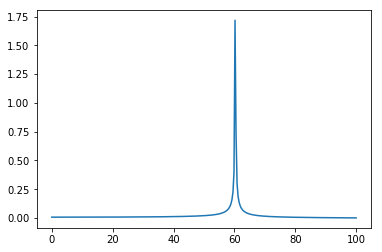

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import time
N_amostras = 600 
f_amostragem = 200
t_amostragem = 1/f_amostragem
x = np.linspace(0.0,N_amostras*t_amostragem,N_amostras) #eixo do tempo 
f = 60.0 # Hz
Am = 2 # amplitude
y = Am*np.cos(2.0*np.pi*f*x)  # sinal senoidal 
start_time2 = time.clock() # logo antes de chamar a função
X_S = np.fft.fft(y)
stop_time2 = time.clock() # logo depois da função ser executada
print("Tempo de execução:",stop_time2-start_time2)
eixo_freq = np.linspace(0.0,1.0/(2.0*t_amostragem),N_amostras//2)
plt.plot(eixo_freq,2.0/N_amostras * np.abs(X_S[:N_amostras//2]))
plt.show()

#### Comentários

Agora que temos os tempos de execução, podemos compará-los e observar em quantas vezes a DFT 'tradicional', sem otimizações, é mais lenta que o algoritmo da FFT. Execute o script abaixo, tendo antes executado os demais:

In [7]:
intervalo_DFT = stop_time1- start_time1
intervalo_FFT = stop_time2 - start_time2
print("A FFT é ",intervalo_DFT/intervalo_FFT,"mais rápida que a DFT")

A FFT é  207.2709677414685 mais rápida que a DFT


Existem maneiras diferentes de implementar a FFT, como calcular a DFT das amostras pares separadas das ímpares do sinal, e no final juntar os dois resultados, diminuindo assim o número de iterações. Parece que não faz diferença? Lembre que, para cada atribuição do array X[k], o somatório de n=0 a n=N-1 é realizado, então temos duas iterações:
- de atribuição, de X[0] até X[N-1]
- de somatório, com os mesmos limites
- total de N² atribuições
- se reduzimos as duas para N/2, temos N²/4 iterações, e um algoritmo pelo menos 4 vezes mais rápido.

Essa é uma maneira rudimentar, veja outros algoritmos acessando:
- [Algoritmo de Goertzel](http://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/ele1095_10_fft.pdf)
-  [Dobramentos sucessivos](https://pt.wikipedia.org/wiki/Transformada_r%C3%A1pida_de_Fourier)


### Equivalente da função _stem()_ do Matlab

Como foi observado no Hands-on 4 de Matlab, a função _stem()_ é uma boa alternativa para a visualização do espectro , pois não conecta os pontos entre si, e sim com o eixo horizontal, o que pode facilitar a visualização dos impulsos. O módulo _Pyplot_, da _Matplotlib_, possui funções que se assemelham muito aos recursos do Matlab, e é bem interessante para programadores acostumados com o estilo deste. O código abaixo é um exemplo desse uso:

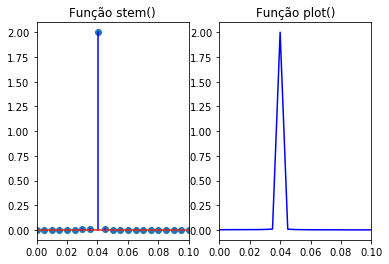

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab 
N_amostras = 2000 #é interessante diminuir o N para o gráfico não ficar com excesso de info.
f_amostragem = 10
t_amostragem = 1/f_amostragem
x = np.linspace(0.0,N_amostras*t_amostragem,N_amostras) #eixo do tempo 
f = 0.04 # Hz
Am = 2 # amplitude
y = Am*np.cos(2.0*np.pi*f*x) # sinal senoidal 



yf = np.fft.fft(y)
xf = np.linspace(0.0,1.0/(2.0*t_amostragem),N_amostras//2)
plt.figure(1)
grafico_1 = plt.subplot(121)
plt.stem(xf,2.0/N_amostras * np.abs(yf[:N_amostras//2]),'b-')
plt.title("Função stem()")
plt.xlim([0.0,0.1])

grafico_2 = plt.subplot(122)
plt.plot(xf,2.0/N_amostras * np.abs(yf[:N_amostras//2]),'b-')
plt.title("Função plot()")
plt.xlim([0.0,0.1])

plt.show()

### Espectro bilateral da amplitude

Anteriormente, quando estávamos plotando o espectro unilateral, precisamos indexar o array com a FFT para que a plotagem fosse só até a metade do mesmo. Isso se deve ao retorno da _numpy.fft.fft()_ ser do espectro todo, o que prejudica a visualização e o entendimento da operação. Pensando nisso, precisamos fazer alguns ajustes no array para que este seja adequadamente exibido:

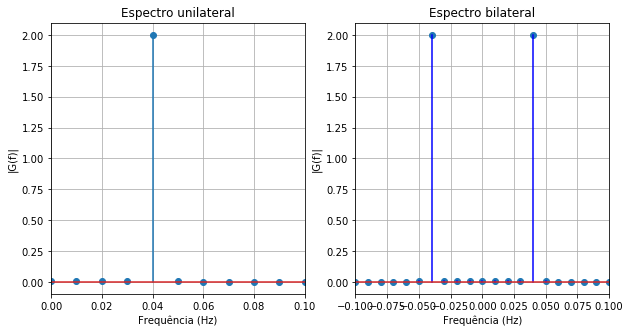

In [50]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack #pacote alternativo ao numpy.fft
N_amostras = 1000
f_amostragem = 10
t_amostragem = 1/f_amostragem
x = np.linspace(0.0,N_amostras*t_amostragem,N_amostras) #eixo do tempo 
f = 0.04 # Hz
Am = 2 # amplitude
y = Am*np.cos(2.0*np.pi*f*x) # sinal senoidal 
yf_uni = fftpack.fft(y)
xf_uni = fftpack.fftfreq(N_amostras,1/f_amostragem)
yf_bi = fftpack.fftshift(fftpack.fft(y)) #operação de shift para reverter o sinal
#o retorno da fft é, por padrão, rotacionado em relação a saida original da dft
#isso foi adotado primeiramente pelo Matlab
#veja nos códigos acima que foi mais fácil de indexar a primeira metade do vetor
#se a saída não fosse rotacionada, precisaríamos de uma sintaxe um pouco mais verbosa
#para que pudéssemos acessar a segunda metade do vetor e plotar a componente de freq > 0
xf_bi = fftpack.fftshift(fftpack.fftfreq(N_amostras, 1/f_amostragem)) 
#faz o mesmonp.linspace(0.0,1.0/(2.0*t_amostragem),N_amostras/2)

plt.figure(1,[10,5])
grafico_1 = plt.subplot(121) 
plt.title("Espectro unilateral")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
plt.xlim([0.0,0.1])
plt.stem(xf_uni,2.0/N_amostras * np.abs(yf_uni))

grafico_2 = plt.subplot(122) #consulte o handson 03-python para entender mais esse método de plotagem múltipla
plt.title("Espectro bilateral")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
grafico_2.stem(xf_bi,2.0/N_amostras * np.abs(yf_bi),'b-')
plt.xlim([-0.1,0.1])
plt.show()

### Análise de sinais pelo espectro de Energia

 Relacionado ao espectro de energia, temos um conceito novo: Densidade espectral de energia  (ESD - _Energy Spectral Density_)  $\psi_g (f)$ , definida como $$ \psi_g(f) = |G(f)|^2  $$
onde $G(f)$ é a especificação do sinal $g(t)$ no domínio da frequência. A ESD pode ser interpretada como uma função densidade de probabilidade, sendo a quantidade de energia por unidade de largura de banda (Hz).

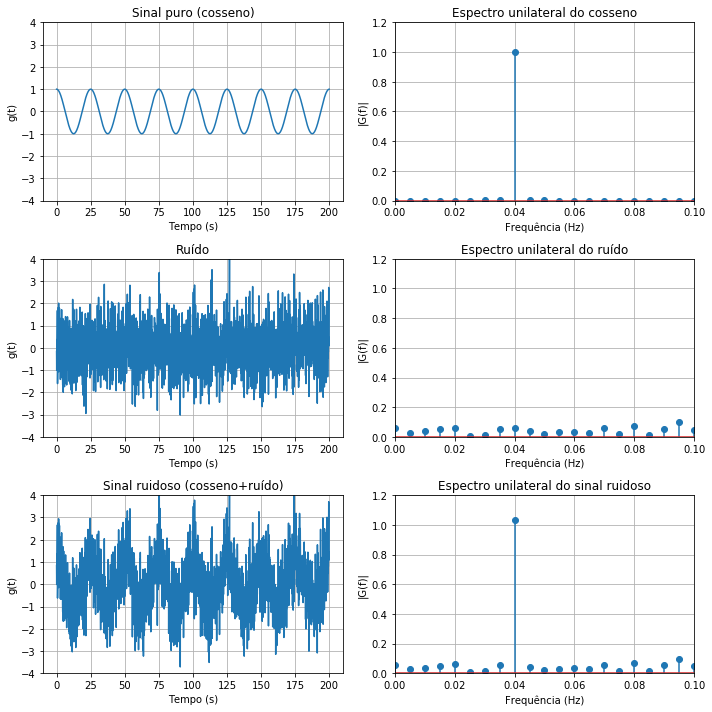

In [27]:
import numpy as np
from scipy import fftpack

N_amostras = 2000
fc = 0.04
fsampling = 10.0
tf = 200 
t_amostragem = 1.0/fsampling
Am = 1.0
desvio_padrao = 1.0
media = 0.0

t = np.arange(0,tf,t_amostragem)
x_hz = fftpack.fftfreq(N_amostras,t_amostragem)

ruido = np.random.normal(media,desvio_padrao,N_amostras) #ruido gaussiano da numpy.random
cosseno = Am*np.cos(2*np.pi*fc*t)
m = cosseno + ruido 


import matplotlib.pyplot as plt
plt.figure(1,[10,10])

grafico_1 = plt.subplot(321)
plt.title("Sinal puro (cosseno)")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.ylim([-4.0,4.0])
plt.plot(t,cosseno)

grafico_2 = plt.subplot(322)
plt.title("Espectro unilateral do cosseno")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
cosseno_F = 2*np.abs(fftpack.fft(cosseno))/N_amostras
plt.xlim([0.0,0.1])
plt.ylim([0.0,1.2])
grafico_2.stem(x_hz,cosseno_F)


grafico_3 = plt.subplot(323)
plt.title("Ruído")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.ylim([-4.0,4.0])
plt.plot(t,ruido)

grafico_4 = plt.subplot(324)
plt.title("Espectro unilateral do ruído")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
ruido_F = 2*np.abs(fftpack.fft(ruido))/N_amostras
plt.stem(x_hz,ruido_F)
plt.xlim([0.0,0.1])
plt.ylim([0.0,1.2])

grafico_5 = plt.subplot(325)
plt.title("Sinal ruidoso (cosseno+ruído)")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.plot(t,ruido+cosseno)
plt.ylim([-4.0,4.0])

grafico_6 = plt.subplot(326)
plt.title("Espectro unilateral do sinal ruidoso")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
plt.xlim([0.0,0.1])
plt.ylim([0.0,1.2])
m_F = 2*np.abs(fftpack.fft(m))/N_amostras
plt.stem(x_hz,m_F)


plt.tight_layout()
plt.show()


**Sugestão de exercícios: ** Realize 2 filtragens:
- A primeira deve remover o ruído do sinal original, retornando um sinal bem próximo do cosseno puro.
- A segunda deve remover o cosseno e retornar apenas o ruído. 

### Janelamento (_Windowing_)

Como alternativa aos que já utilizávamos (SciPy e Numpy), vamos introduzir o módulo _spectrum_, com funções específicas para casos de janelamento, periodograma, PSD (tópico do próximo Hands-on), entre outros recursos. Como não está contido no pacote Anaconda, podemos instalar via terminal com:
```bash
pip install spectrum
```

A técnica de janelamento, análoga a filtragem (convolução no tempo x multiplicação na frequência), serve para restringir um sinal temporal a uma faixa específica, limitada, de valores, visto que a DFT não pode ser aplicada em sinais infinitos no tempo.

A transformada de Fourier de um sinal em janela corresponde à convolução periódica da transformada de Fourier da janela $\omega(n)$ com a transformada de Fourier do sinal original $x(n)$.
Devido à estrutura de lóbulo de uma janela, a convolução resulta em fuga de um componente de frequência para frequências adjacentes. Além disso, o lóbulo principal de uma janela é responsável por distorcer componentes de freqüência e, portanto, reduzir a resolução de freqüência. Matematicamente, entende-se janelamento como:

$$V(n)=x(n) \cdot  \omega(n)$$
em que $\omega(n)$ é a janela que limita $x(n)$.


A necessidade do janelamento é vista a medida em que a DFT não pode ser aplicada em um sinal infinito. Em termos matemáticos:

$$V(e^{jw}) = \frac{1}{2\pi}\int_{-\pi}^{\pi}X(e^{j\theta }) \cdot  W(e^{j(w-\theta)})d\theta  $$


A fim de aumentar a resolução de freqüência, precisamos fazer o lobo principal da janela o mais estreito possível e para reduzir o vazamento, o lóbulo lateral o menor possível. Para isso, faremos uso das janelas mostradas no script abaixo, no qual a visualização é feita nos dois domínios:

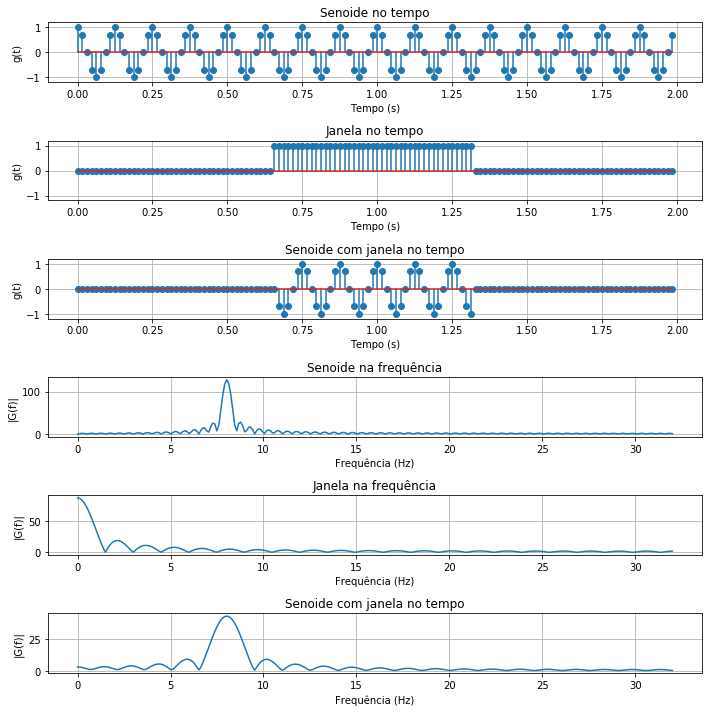

In [46]:
import numpy as np
from scipy import fftpack

fc = 8                             #frequência do cosseno
fsampling = 64.0                   #frequência de amostragem
tf = 2                             #segundos
t_amostragem = 1.0/fsampling       #tempo de amostragem
Am = 1.0                           #amplitude
m1 = Am*np.cos(2*np.pi*fc*t)
t = np.arange(0,tf,t_amostragem)

#criação da janela retangular 
m2 = np.zeros(len(t))
m2[len(t)//3:len(t)*2//3] = 1 

lfft = 600

import matplotlib.pyplot as plt
plt.figure(1,[10,10])

grafico_1 = plt.subplot(611)
plt.title("Senoide no tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.ylim([-1.2,1.2])
plt.stem(t,m1)

grafico_2 = plt.subplot(612)
plt.title("Janela no tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.ylim([-1.2,1.2])
plt.stem(t,m2)


grafico_3 = plt.subplot(613)
plt.title("Senoide com janela no tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("g(t)")
plt.grid()
plt.ylim([-1.2,1.2])
plt.stem(t,m2*m1)

#transformação dos sinais no tempo para frequência 
m1fft = 2.0*np.abs(fftpack.fft(m1,lfft))
m1fft = m1fft[:lfft//2]

f = np.linspace(0.0,fsampling/2,lfft//2)

m2fft = 2.0*np.abs(fftpack.fft(m2,lfft))
m2fft = m2fft[:lfft//2]

m3fft = 2.0*np.abs(fftpack.fft(m1*m2,lfft))
m3fft = m3fft[:lfft//2]


grafico_4 = plt.subplot(614)
plt.title("Senoide na frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
plt.plot(f,m1fft)


grafico_5 = plt.subplot(615)
plt.title("Janela na frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()
plt.plot(f,m2fft)

grafico_6 = plt.subplot(616)
plt.title("Senoide com janela no tempo")
plt.xlabel("Frequência (Hz)")
plt.ylabel("|G(f)|")
plt.grid()

plt.plot(f,m3fft)



plt.tight_layout()
plt.show()


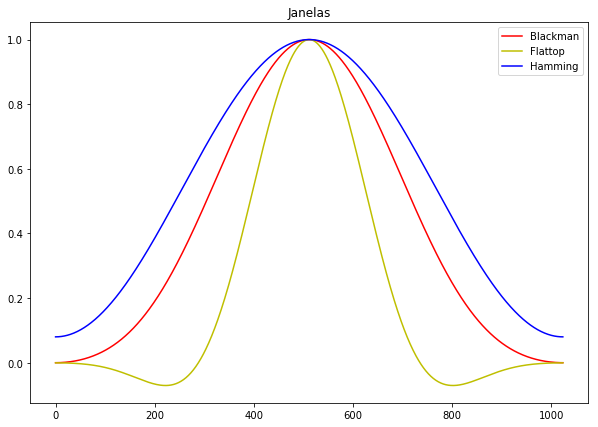

In [16]:
#extraindo os arrays das janelas
# a classe Window possui um atributo chamado 'data' : array com os valores de amplitude
from spectrum.window import Window
from matplotlib import pyplot as plt 
import numpy as np
N_pontos = 1024 
b = Window(N_pontos, name= 'blackman')
f = Window(N_pontos, name= 'flattop')
h = Window(N_pontos, name= 'hamming')

x = np.linspace(0,N_pontos-1,N_pontos)
plt.figure(1,[10,7])
plt.plot(x,b.data,'r',x,f.data,'y',x,h.data,'b')
plt.legend(['Blackman','Flattop','Hamming'])
plt.title("Janelas")
plt.show()

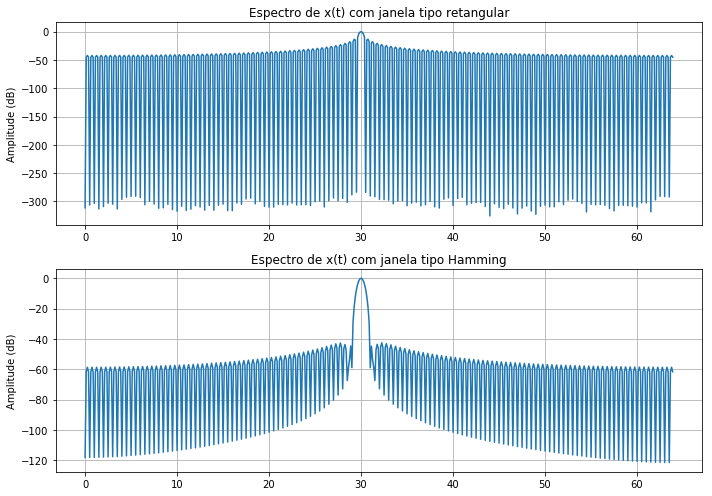

In [94]:
%matplotlib inline 
from spectrum.window import Window
from matplotlib import pyplot as plt 
import numpy as np
from scipy import fftpack
N_pontos = 256 
N_fft = 1024
fs = 128

h = Window(N_pontos, name= 'hamming')
r = np.ones(N_pontos) #janelar com uma retangular r[n] = 1 para todo n é como não realizar nenhuma operação


fc = 30.0
freq=np.linspace(0,N_fft,N_fft)*fs/N_fft;  
n = np.arange(0,N_pontos,1)
x = np.linspace(0,N_pontos-1,N_pontos)*fs/N_pontos
y = np.cos(2.0*fc*np.pi*n/fs)

YR = y
YR = fftpack.fft(YR,N_fft) # fft 
YR = 2.0*np.abs(YR)/N_fft #normalização

YH = y*h.data #janelamento
YH = fftpack.fft(YH,N_fft) # fft 
YH = 2.0*np.abs(YH)/N_fft #normalização



plt.figure(1,[10,7])

plt.subplot(211)
plt.plot(freq[:N_fft//2],20.0*np.log10(YR[:N_fft//2]/max(YR)))
plt.grid()
plt.title("Espectro de x(t) com janela tipo retangular")
plt.ylabel("Amplitude (dB)")


plt.subplot(212)
plt.plot(freq[:N_fft//2],20.0*np.log10(YH[:N_fft//2]/max(YH)))
plt.grid()
plt.title("Espectro de x(t) com janela tipo Hamming")
plt.ylabel("Amplitude (dB)")

plt.tight_layout()
plt.show()